In this notebook I visualize the RBM models in terms of parameters and dimensionality reduction (Figs 1-2, 5-6)

In [1]:
rootf = FOLDER ## place here the folder where you save all the folders of the git ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = ['Garuda']
mpl.rcParams['font.serif'] = ['Garuda-Oblique']

curr_float = np.float32
curr_int = np.int16

def convert_number(seqs): # convert to numbers already aligned seqs
    aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V',  'W', 'Y','-']
    aadict = {aa[k]: k for k in range(len(aa))}
    msa_num = np.array(list(map(lambda x: [aadict[y] for y in x], seqs[0:])), dtype=curr_int, order="c")
    
    return msa_num

def convert_letter(seqs_n): # convert to numbers already aligned seqs
    aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V',  'W', 'Y','-']
    aadictinv = {k: aa[k] for k in range(len(aa))} 
    seqs=[]
    if type(seqs_n[0]) == curr_int:
        seqs.append(''.join([aadictinv[e] for e in seqs_n]))
    else:
        for t in range(len(seqs_n)):
            seqs.append(''.join([aadictinv[e] for e in seqs_n[t]]))
    return seqs

def uniqueIndexes(l):
    seen = set()
    res = []
    for i, n in enumerate(l):
        if n not in seen:
            res.append(i)
            seen.add(n)
    return res

#%matplotlib inline
import sys, os, pickle
sys.path.append('/home/barbara/.local/lib/python3.6/site-packages/')
sys.path.append(rootf + '/PGM/source/')
sys.path.append(rootf + '/PGM/utilities/')
sys.path.append(rootf + '/Align_utils/')
from common_imports import set_num_threads
set_num_threads(1) # Set the number of cores. Must be executed before importing numpy&numba.
import rbm,utilities
import Proteins_utils, RBM_utils, utilities, sequence_logo, plots_utils

In /home/barbara/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/barbara/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/barbara/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/barbara/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/barbara/.local/lib/python3.6/site-packages/matplotlib/mpl-d

In [2]:
## Focus on the sample Pt3 NA

ptn = 3
pep = 'NA'
interesting_features = [7,11]

## another sample: Pt5 CR ##
#ptn = 5
#pep = 'CR'
#interesting_features = [15,6]

## Choose the model's parameters ##
n_v = 19 # Number of visible units; = # sites in alignment.
n_h = 25 # Number of hidden units.
hu = n_h
l12 = 0.1

TS=80

path_in = rootf + '/Data/Count-weighted'

# Data
filename_3w = '/CDR3fasta_pt' + str(ptn) + '_' + pep +'_3w.fasta'
all_data_3w = Proteins_utils.load_FASTA(path_in + filename_3w,with_labels=False,remove_insertions=False, drop_duplicates=False)

filename_day0 = '/CDR3fasta_pt' + str(ptn) + '_day0.fasta'
all_data_day0 = Proteins_utils.load_FASTA(path_in + filename_day0,with_labels=False,remove_insertions=False, drop_duplicates=False)

B = all_data_3w.shape[0] # here I set the weight of each seqs to 1
all_weights = np.ones(int(B*TS/100))
data_tr = all_data_3w[0:int(B*TS/100)]
l2f = 1/len(data_tr)

tt='day0'
path_od0 = rootf + '/Models/CDR3out_pt' + str(ptn) + '_' + str(tt) 
tt='3w'
path_o3w = rootf + '/Models/CDR3out_pt' + str(ptn) + '_' + pep + '_' + str(tt) 

namem_d0 = path_od0 + '/model_' + str(hu) + '_' + str(l12) + '.data'
namem_3w = path_o3w + '/model_' + str(hu) + '_' + str(l12) + '_logo.data'

RBM_d0 = RBM_utils.loadRBM(namem_d0)
RBM_3w = RBM_utils.loadRBM(namem_3w)
we_d0 = RBM_d0.weights
we_3w = RBM_3w.weights

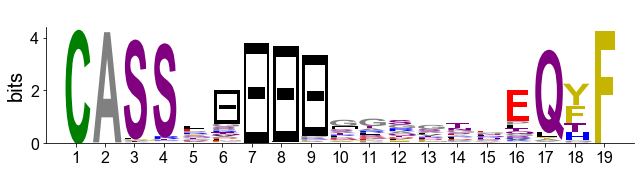

In [3]:
## Biases of the RBM ##
RBM_3w.vlayer.get_params()
fields = RBM_3w.vlayer._fields[0,:,:]

Le=19
Na=21   
fields_g = np.zeros((Le,Na)) # weighted and gauged
for i in range(Le):
    for a in range(Na):
        fields_g[i,a] = np.copy(fields[i,a] - np.sum(fields, axis=1)[i]/Na)
        
sume = np.exp(fields_g) 
sel_prob = np.zeros((Le,Na))
for i in range(Le):
        sel_prob[i,:] = sume[i,:]/np.sum(sume, axis=1)[i]
        
s2=16
fig=sequence_logo.Sequence_logo(sel_prob, figsize=(9,2.5), ylabel = r'bits', title = ' ', ticks_every = 1, ticks_labels_size=s2);

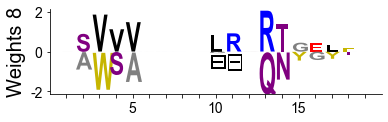

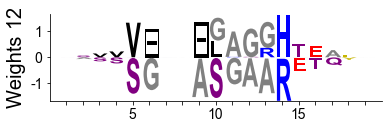

In [4]:
s2=16
for i in range(len(interesting_features)):
    fig = sequence_logo.Sequence_logo(we_3w[interesting_features[i]], figsize=(5.5,1.8), ylabel = 'Weights ' + str(interesting_features[i]+1),  ticks_every=5, ticks_labels_size=s2-2) 

Mismatch dimensions (100, 25), [10, 25], reinitializating I
Mismatch dimensions (100, 19, 21), [10, 19, 21], reinitializating I


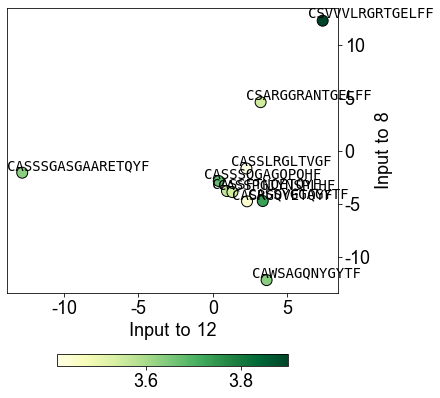

In [5]:
summary = pd.read_csv(rootf + '/Data/summary_pt'+str(ptn)+'_'+ pep +'.tsv', sep='\t', low_memory=False)
seqs = list(summary['CDR3'])
subset = uniqueIndexes(seqs)
summary1=summary.loc[subset,:]
val_seqs = list((summary1['CDR3_gap'].values))
val_seqs_ng = list((summary1['CDR3'].values))
val_seqs_n = convert_number(val_seqs)
mult_seqs = summary1['Mult 3w (rep)'].values

ll = RBM_3w.likelihood(val_seqs_n)

ind_sort = np.argsort(ll)[::-1]
ntop = 10 ## how many sequenes to plot##

I = RBM_3w.vlayer.compute_output(val_seqs_n[ind_sort[:ntop]],RBM_3w.weights)

ix = interesting_features[1]
iy = interesting_features[0]

s1 = 120.0
fig, ax = plt.subplots()
fig.set_figwidth(6.2)
fig.set_figheight(6)

listan = [val_seqs_ng[ind_sort[t]] for t in range(ntop)]
x=I[:,ix]
y=I[:,iy]

sc = ax.scatter(x,y, s=s1, c = np.log10(mult_seqs[ind_sort[:ntop]]), edgecolors='k', cmap='YlGn')
for i, txt in enumerate(listan):
    ax.annotate(txt, (x[i]-1, y[i]+0.25), fontfamily='monospace', fontvariant='small-caps', fontsize=14)

s2=18
ax.set_xlabel('Input to ' + str(ix+1), fontsize=s2)
ax.set_ylabel('Input to ' + str(iy+1), fontsize=s2)

cbar = plt.colorbar(mappable=sc, ax=ax, shrink=0.7,orientation='horizontal')
cbar.ax.tick_params(labelsize=s2)

ax.tick_params(axis='both', which='major', labelsize = s2)

ax.tick_params(axis='both', which='major', labelsize = s2)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.tight_layout()

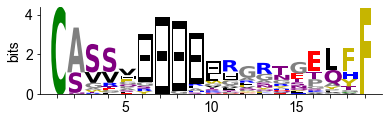

In [8]:
## Visualize logo of clones with top response score ##
ll_rel = RBM_3w.likelihood(val_seqs_n) - RBM_d0.likelihood(val_seqs_n)
s2=16
ntop = 50
ind_sort_rel= np.argsort(ll_rel)[::-1]
pwm_top = utilities.average(val_seqs_n[ind_sort_rel[:ntop]], c=21)
fig = sequence_logo.Sequence_logo(pwm_top, figsize=(5.5,1.8), ylabel = 'bits', ticks_every=5, ticks_labels_size=s2-2,title_size=s2-2)

In [5]:
## Features of the RBM - Left-Right format ##

RBM =  RBM_utils.loadRBM(name_r)
ptn=3
pep='NA'
hu=25
l12=0.1
tt='3w'
path_o3w = rootf + '/Models/CDR3out_pt' + str(ptn) + '_' + pep + '_' + str(tt)
namem_3w = path_o3w + '/model_' + str(hu) + '_' + str(l12) + '_LR.data'
RBM =  RBM_utils.loadRBM(namem_3w)

max_L=19
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
aadict = {amino_acids[k]: k for k in range(len(amino_acids))}

max_L = 19
max_depth = max_L
Le=max_L
Na=len(amino_acids)

features = []
for aa in amino_acids:
    features += [['a' + aa + str(L)] for L in range(max_depth)]
    features += [['a' + aa + str(L)] for L in range(-max_depth, 0)] # features for encoding

features_r = []
for aa in amino_acids:
    features_r += [['a\t' + aa + '\t' + str(L)] for L in range(max_depth)]
    features_r += [['a\t' + aa + '\t' + str(L)] for L in range(-max_depth, 0)]  # features for writing

feature_dict = {tuple(f): i for i, f in enumerate(features)}
feature_dict_inv = {i:f for i, f in enumerate(features)}

W_fin_L = np.zeros((hu,max_L,len(amino_acids)))
W_fin_R = np.zeros((hu,max_L,len(amino_acids)))

for u in range(len(features_r)):
    string = features_r[u][0]
    split_string = string.split("\t")
    if split_string[0] == 'a':
        ind_aa = aadict[split_string[1]]
        ind_pos = int(split_string[2])
        if ind_pos >= 0:
            W_fin_L[:,ind_pos,ind_aa] = (RBM.weights)[:,u,1]
            
        if ind_pos < 0:
            W_fin_R[:,ind_pos,ind_aa] = (RBM.weights)[:,u,1]
            
## enforce a zero-sum gauge for visualization ##
Wzs_fin_L = np.zeros((hu,max_L,len(amino_acids)))
Wzs_fin_R = np.zeros((hu,max_L,len(amino_acids)))
for m in range(hu):
    for i in range(max_L):
        Wzs_fin_L[m,i,:] = W_fin_L[m,i,:] - 1/(Na)*np.sum(W_fin_L[m,i,:])
        Wzs_fin_R[m,i,:] = W_fin_R[m,i,:] - 1/(Na)*np.sum(W_fin_R[m,i,:])

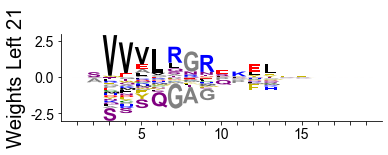

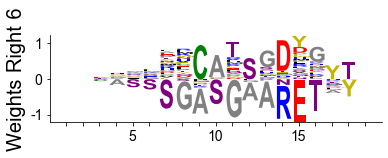

In [6]:
s2=16
interesting_features=[20]
for i in range(len(interesting_features)):
    fig = sequence_logo.Sequence_logo(Wzs_fin_L[interesting_features[i]], figsize=(5.5,1.8), ylabel = 'Weights Left ' + str(interesting_features[i]+1),  ticks_every=5, ticks_labels_size=s2-2)

interesting_features=[5]
for i in range(len(interesting_features)):
    fig = sequence_logo.Sequence_logo(Wzs_fin_R[interesting_features[i]], figsize=(5.5,1.8), ylabel = 'Weights Right ' + str(interesting_features[i]+1),  ticks_every=5, ticks_labels_size=s2-2)

From here I consider data specific to viral antigens from Dash et al. 2017, Glanville et al. 2017 

In [6]:
path_o = rootf + '/Data/Glanvilleetal2017'
filename = path_o + '/tcrb_label.txt'
labels=[]
with open(filename) as f:
    for line in f:
        linesplit = line.strip().split('\t')
        nogap2=linesplit[0].replace(' ','')
        labels.append(nogap2)
        
path_o = rootf + '/Data/Glanvilleetal2017'
filename = path_o + '/tcrb_aligned_logo.txt'
seqs = []
with open(filename) as f:
    for line in f:
        linesplit = line.strip().split('\t')
        nogap1=linesplit[0].replace(' ','')
        seqs.append(nogap1)


labels_u = list(np.unique(labels));
seqs_n = convert_number(seqs)
all_data = np.copy(seqs_n)
indtot = []
for ll in labels_u:
    ind_temp=[]
    for li in range(len(labels)):
        if labels[li] == ll:
            ind_temp.append(li)
    indtot.append(ind_temp)
    
labels_fin=[u'NP$_{44}$', u'M1$_{58}$', u'BLMF1$_{280}$',u'NP$_{177}$',u'pp65$_{495}$',u'pp65$_{417}$', u'pp50$_{245}$']

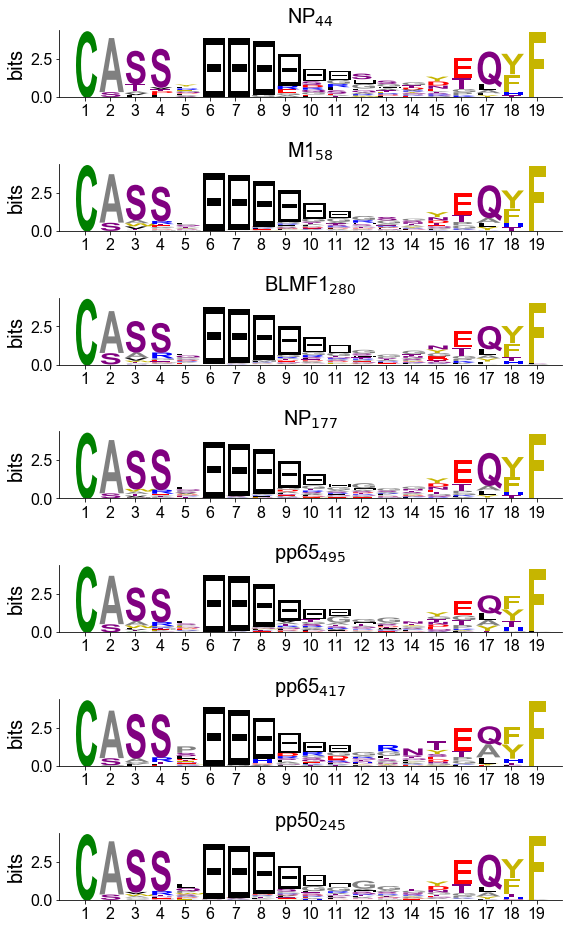

In [7]:
## Logos of each antigen-specific repertoire ##

listl_tit = labels_fin
s2=16
fig, axes = plt.subplots(len(indtot),1)
fig.set_figheight(16)
fig.set_figwidth(9)
plt.subplots_adjust(wspace = 0.5, hspace=1)

for u in range(len(indtot)):
    pwm=utilities.average(all_data[indtot[u]], c = 21)
    ylabel30 = 'bits'  
    ax=axes[u]
    sequence_logo.Sequence_logo(pwm, ax = ax, ylabel = ylabel30, figsize=(9,2.5),  ticks_every=1, ticks_labels_size=s2, title=listl_tit[u]); 

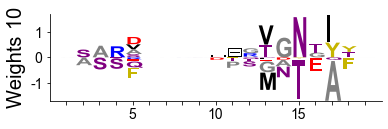

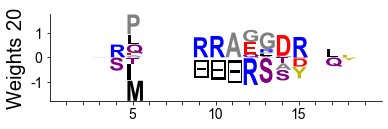

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


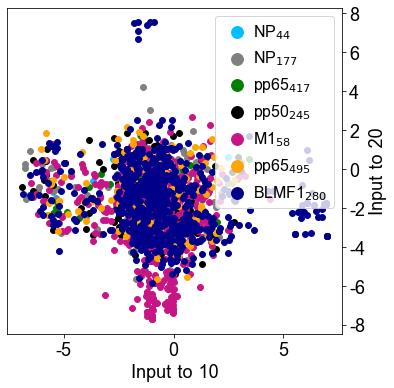

In [8]:
all_data = convert_number(seqs)
hu = 25
l12 = 0.1

name_r =  rootf + '/Models/Glanvilleetal2017/model_' + str(hu) + '_' + str(l12) + '.data'
RBM =  RBM_utils.loadRBM(name_r)

interesting_features=[9,19]
s2=16
for i in range(len(interesting_features)):
    fig = sequence_logo.Sequence_logo(RBM.weights[interesting_features[i]], figsize=(5.5,1.8), ylabel = 'Weights ' + str(interesting_features[i]+1),  ticks_every=5, ticks_labels_size=s2-2) 

I = RBM.vlayer.compute_output(all_data,RBM.weights)
listl=labels_u
colors1 = [[199/255,21/255,133/255],'orange',[0,0,139/255]]
colors2 = [[0,191/255,255/255],'gray','green','k','b']

s1 = 35.0


ix = interesting_features[0]
iy = interesting_features[1]

s2=18

fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(6)

r=0
for y in [0,3,5,6]:
    ax.scatter(I[indtot[y],ix],I[indtot[y],iy],c=colors2[r], s=s1, label=labels_fin[y])
    r+=1

r=0
for y in [1,4,2]:
    ax.scatter(I[indtot[y],ix],I[indtot[y],iy],c=colors1[r], s=s1, label=labels_fin[y])
    r+=1

ax.set_xlabel('Input to '+ str(ix+1),fontsize=s2)
ax.set_ylabel('Input to '+ str(iy+1),fontsize=s2)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.tick_params(axis='both', which='major', labelsize = s2)
plt.legend(fontsize=s2-2,markerscale=2,frameon=True,handletextpad=0.01, loc="upper right");

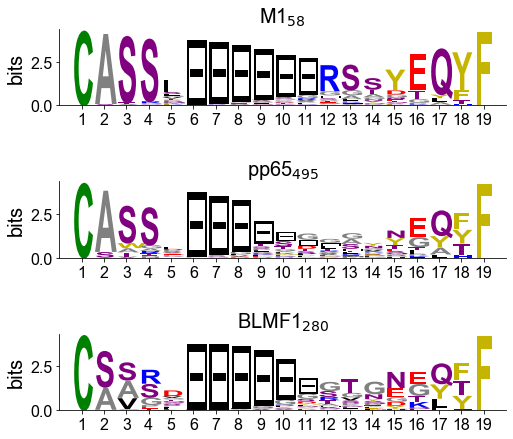

In [9]:
filename = '/tcrb_aligned_logo.txt'
path_o = rootf + '/Data/Dashetal2017'

seqs = []
with open(path_o+filename) as f:
    for line in f:
        linesplit = line.strip().split('\t')
        nogap1=linesplit[0].replace(' ','')
        seqs.append(nogap1)

label = []
with open(path_o+ '/tcrb_label.txt') as f:
    for line in f:
        linesplit = line.strip().split('\t')
        nogap1=linesplit[1].replace(' ','')
        label.append(nogap1)
        
indM1 = []
indpp65 = []
indBMLF = []
for t in range(len(label)):
    if label[t] == 'M1':
        indM1.append(t)
    if label[t] == 'pp65':
        indpp65.append(t)
    if label[t] == 'BMLF':
        indBMLF.append(t)
        
indtot=[indM1,indpp65,indBMLF]
listl=[u'M1$_{58}$',u'pp65$_{495}$',u'BLMF1$_{280}$']

listl_tit = listl
all_data=convert_number(seqs)

s2=16
fig, axes = plt.subplots(3,1)
fig.set_figheight(7)
fig.set_figwidth(8)
plt.subplots_adjust(wspace = 0.5, hspace=1)

for u in range(len(indtot)):
    pwm=utilities.average(all_data[indtot[u]], c = 21) 
    ax=axes[u]
    sequence_logo.Sequence_logo(pwm, ax = ax, ylabel = ylabel30, figsize=(9,2.5),  ticks_every=1, ticks_labels_size=s2, title=listl_tit[u])

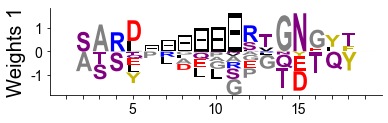

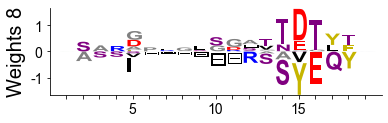

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


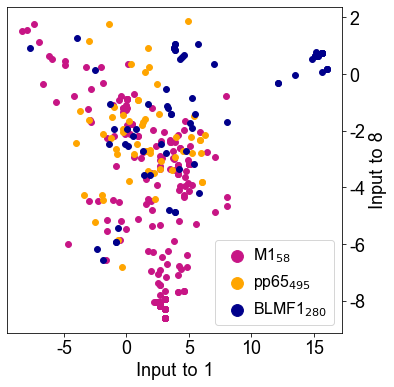

In [10]:
all_data = convert_number(seqs)
hu = 10
l12 = 0.1

name_r =  rootf + '/Models/Dashetal2017/model_' + str(hu) + '_' + str(l12) + '.data'
RBM =  RBM_utils.loadRBM(name_r)

interesting_features=[0,7]
s2=16
for i in range(len(interesting_features)):
    fig = sequence_logo.Sequence_logo(RBM.weights[interesting_features[i]], figsize=(5.5,1.8), ylabel = 'Weights ' + str(interesting_features[i]+1),  ticks_every=5, ticks_labels_size=s2-2) 

I = RBM.vlayer.compute_output(all_data,RBM.weights)

colors = [[199/255,21/255,133/255],'orange',[0,0,139/255]]
s1 = 35.0


ix = interesting_features[0]
iy = interesting_features[1]

s2=18

fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(6)

ax.scatter(I[indtot[0],ix],I[indtot[0],iy],c=colors[0], s=s1, label=listl[0])
ax.scatter(I[indtot[1],ix],I[indtot[1],iy],c=colors[1], s=s1, label=listl[1])
ax.scatter(I[indtot[2],ix],I[indtot[2],iy],c=colors[2], s=s1, label=listl[2])
ax.set_xlabel('Input to '+ str(ix+1),fontsize=s2)
ax.set_ylabel('Input to ' + str(iy+1),fontsize=s2)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.tick_params(axis='both', which='major', labelsize = s2)
plt.legend(fontsize=s2-2,markerscale=2,frameon=True,handletextpad=0.01, loc="lower right");
